# Social Media may affect generations differently

Synthia Sasulski (@synthia2080), Ash Kandari (), Xavier Skinner (), Luis de Santos (), Ethan Ng ()


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from ml_analysis import *
from helper_code import *

### Introduction

In [2]:
NSDUH2021Cols = ["AGE3","IRSEX","AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","SUIPLANYR","ADDPREV"]; NSDUH201819Cols = ["AGE2", "IRSEX", "AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","ADDPREV"]
CoreTrends2021Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","gender", "age"]; CoreTrends2019Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]; CoreTrends2018Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]
NSDUH2019_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt", "txt", NSDUH201819Cols); NSDUH2018_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv", "tsv", NSDUH201819Cols); NSDUH2021_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt", "txt", NSDUH2021Cols)
CoreTrends2021_wantedCols = readInAndGetWantedColumns("datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv", "csv", CoreTrends2021Cols); CoreTrends2019_wantedCols = readInAndGetWantedColumns("datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv", "csv", CoreTrends2019Cols); CoreTrends2018_wantedCols = readInAndGetWantedColumns("datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv", "csv", CoreTrends2018Cols)

### Data/Cleaning (code in helper_code.py)
For both Datasets, first all data is converted to numeric
<br><ins>CoreTrends Dataset [cleanUpCoreTrends()]: </ins>
<br>Drop 'sns2a' column since all values are empty.
<br>Remove values over 98 since those indicate a refused/skipped.
<br>Cut age data into bins representing ranges of ages to match with NSDUH.
<br>Melt the data into longform, using selected id and values.
<br>Convert the values from ints to more descriptive value then drop null values.
<br><br>
<ins>NSDUH Dataset [cleanUpNSDUH()]:</ins>
<br>Remove values over 85 because those indicate a refused/skipped.
<br>Cut age data into matching bins as CoreTrends
<br>Cut the desired column values into two bins for more relevant/consistent data.
<br>Melt the data into longform, using selected id and values
<br>Rename AGE2/AGE3 column to age, for consistency and drop null values



In [3]:
CoreTrends_id = ['age']; CoreTrends_values = ["web1a", "web1b", "web1c", "web1d", "web1e"]
NSDUH_id=['AGE2']; NSDUH_values = ['DSTCHR12']
CoreTrends2018_long = cleanUpCoreTrends(CoreTrends2018_wantedCols, CoreTrends_id, CoreTrends_values); CoreTrends2019_long = cleanUpCoreTrends(CoreTrends2019_wantedCols, CoreTrends_id, CoreTrends_values); CoreTrends2021_long = cleanUpCoreTrends(CoreTrends2021_wantedCols, CoreTrends_id, CoreTrends_values)
NSDUH2018_long = cleanUpNSDUH(NSDUH2018_wantedCols,NSDUH_id,NSDUH_values); NSDUH2019_long = cleanUpNSDUH(NSDUH2019_wantedCols,NSDUH_id,NSDUH_values); NSDUH2021_long = cleanUpNSDUH(NSDUH2021_wantedCols,['AGE3'],NSDUH_values)

### Visual 1

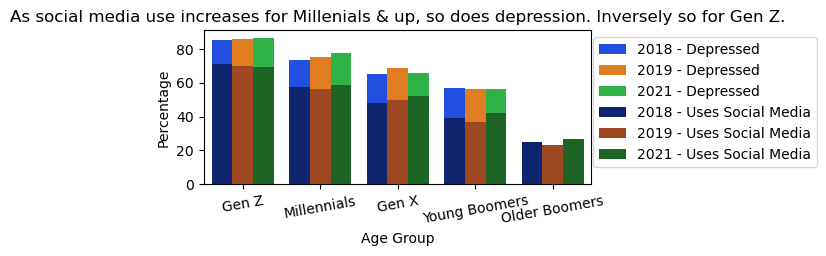

In [4]:
percDepressed_NSDUH2018 = getPercentage(NSDUH2018_long, "Depressed", "age", 2018); percDepressed_NSDUH2019 = getPercentage(NSDUH2019_long, "Depressed", "age", 2019); percDepressed_NSDUH2021 = getPercentage(NSDUH2021_long, "Depressed", "age", 2021)
SMUse_sum_CoreTrends2018 = getPercentage(CoreTrends2018_long, "Uses Social Media", "age", 2018); SMUse_sum_CoreTrends2019 = getPercentage(CoreTrends2019_long, "Uses Social Media", "age", 2019); SMUse_sum_CoreTrends2021 = getPercentage(CoreTrends2021_long, "Uses Social Media", "age", 2021)
CoreTrends_SMUseSum_concat = pd.concat([SMUse_sum_CoreTrends2018,SMUse_sum_CoreTrends2019, SMUse_sum_CoreTrends2021]);NSDUH_concat = pd.concat([percDepressed_NSDUH2018,percDepressed_NSDUH2019,percDepressed_NSDUH2021])
plt.figure(figsize=(5, 2))
sns.barplot(data=NSDUH_concat, x='age', y='percentage',hue='dataset', palette='bright'); sns.barplot(data=CoreTrends_SMUseSum_concat, x='age', y='percentage', hue='dataset' ,palette='dark')
plt.title("As social media use increases for Millenials & up, so does depression. Inversely so for Gen Z.")
plt.ylabel("Percentage"); plt.xlabel("Age Group"); plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1)); plt.xticks(rotation=10);

### Visual 2

### Visual 3

### ML 1

### ML 2 - KNN (ml_analysis.py)

In [5]:
knnClassifier("IMPSOCM") #May take a bit to run, for me it bit over a minute.

Accuracy for 9 neighbors: 75.55%


Explanation for ML 2...

### Conclusion